# **Deep Learning & Computer Vision**
## **Name - Anush Dubey**
## **Roll No.- 20MIP10001**

# **1.	Thresholding**

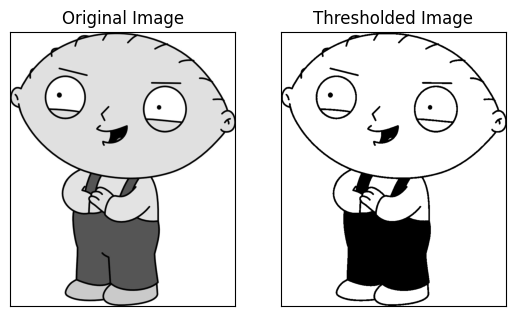

In [11]:
# Import the required libraries
import cv2             # OpenCV for image processing
import numpy as np     # NumPy for numerical operations
from matplotlib import pyplot as plt  # Matplotlib for plotting

# Load an image in grayscale
image = cv2.imread('/content/sample_data/image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply simple thresholding
# Using the cv2.threshold() function to convert the grayscale image to a binary image
# Pixels with intensity greater than 127 become white (255), while those less than or equal to 127 become black (0)
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images side by side
plt.subplot(1, 2, 1)  # Create a subplot for the original image
plt.imshow(image, cmap='gray')  # Display the grayscale image with a gray colormap
plt.title('Original Image')  # Set the title for the subplot
plt.xticks([]), plt.yticks([])  # Remove x and y tick labels
plt.subplot(1, 2, 2)  # Create a subplot for the thresholded image
plt.imshow(thresholded, cmap='gray')  # Display the thresholded image with a gray colormap
plt.title('Thresholded Image')  # Set the title for the subplot
plt.xticks([]), plt.yticks([])  # Remove x and y tick labels
plt.show()  # Show the subplots with the images


# **2.	Region Based Image Segmentation**

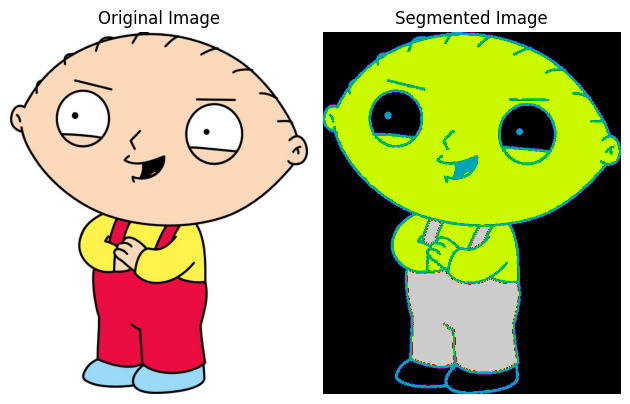

In [12]:
# Import necessary libraries
import cv2           # OpenCV library for computer vision tasks
import numpy as np   # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting

# Load the image
image = cv2.imread('/content/sample_data/image.jpg')  # Load an image from a file

# Convert the image to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR image to RGB

# Flatten the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))  # Reshape the image to a 2D array of pixels, each with RGB values

# Convert to floating-point for K-Means
pixels = np.float32(pixels)  # Convert pixel values to floating-point format for K-Means

# Define the criteria and number of clusters for K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)  # Convergence criteria for K-Means
num_clusters = 4  # Number of clusters to find using K-Means

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Apply K-Means algorithm to cluster pixel data into specified number of clusters
# The result includes cluster labels for each pixel and cluster centers

# Convert the cluster labels to a 2D mask
segmented_mask = labels.reshape(image.shape[0], image.shape[1])  # Reshape labels to image shape

# Display the original and segmented images
plt.subplot(1, 2, 1)  # Create a subplot for original image
plt.imshow(image_rgb)  # Display the original RGB image
plt.title('Original Image')  # Set the title for the subplot
plt.axis('off')  # Turn off axis labels and ticks

plt.subplot(1, 2, 2)  # Create a subplot for segmented image
plt.imshow(segmented_mask, cmap='nipy_spectral')  # Display the segmented image with a colormap
plt.title('Segmented Image')  # Set the title for the subplot
plt.axis('off')  # Turn off axis labels and ticks

plt.tight_layout()  # Adjust layout for better visualization
plt.show()  # Show the entire plot with subplots and images


# **3.	Region growing Image Segmentation**

<ipython-input-13-cd950f9c4858>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visited = np.zeros((rows, cols), dtype=np.bool)
<ipython-input-13-cd950f9c4858>:24: RuntimeWarning: overflow encountered in ubyte_scalars
  if not visited[row, col] and np.abs(image[row, col] - image[seed]) <= threshold:


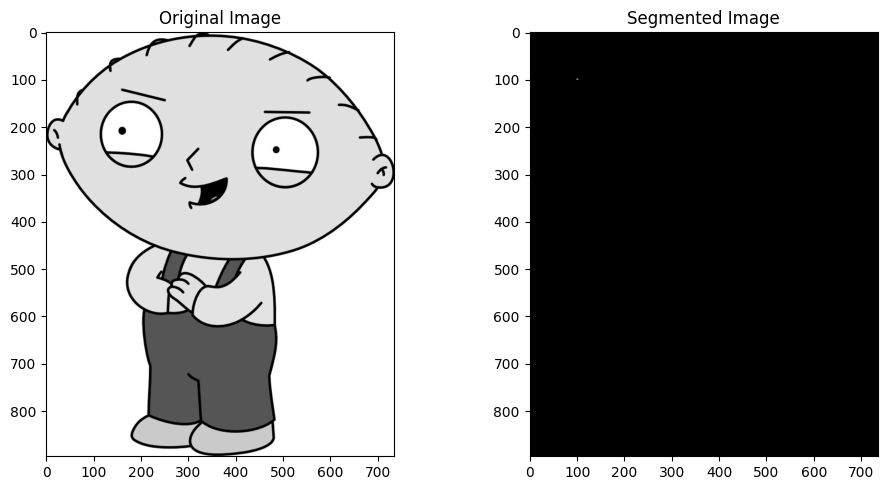

In [13]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define a region growing function
def region_growing(seed, image, threshold):
    # Get the dimensions of the image
    rows, cols = image.shape

    # Initialize arrays to track visited pixels and segmented pixels
    visited = np.zeros((rows, cols), dtype=np.bool)
    segmented = np.zeros((rows, cols), dtype=np.uint8)

    # Initialize a queue and add the seed point
    queue = []
    queue.append(seed)

    # Start the region growing process
    while queue:
        row, col = queue.pop(0)

        # Check if the pixel is unvisited and meets the threshold condition
        if not visited[row, col] and np.abs(image[row, col] - image[seed]) <= threshold:
            visited[row, col] = True
            segmented[row, col] = 255

            # Define the neighbors of the current pixel
            neighbors = [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1)]

            # Check each neighbor and add valid ones to the queue
            for n_row, n_col in neighbors:
                if 0 <= n_row < rows and 0 <= n_col < cols:
                    queue.append((n_row, n_col))

    # Return the segmented image
    return segmented

# Load the image in grayscale
image = cv2.imread('/content/sample_data/image.jpg', cv2.IMREAD_GRAYSCALE)

# Seed point for region growing
seed_row, seed_col = 100, 100

# Define the region growing threshold
threshold = 10  # Adjust this threshold based on your image and requirements

# Perform region growing using the defined function
segmented = region_growing((seed_row, seed_col), image, threshold)

# Display the original and segmented images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# **4.	Edge based Image Segmentation**

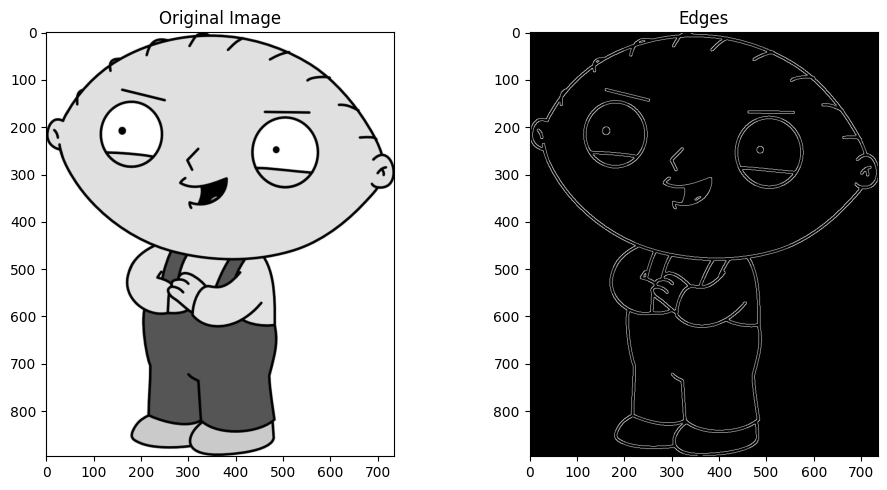

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image in grayscale
image = cv2.imread('/content/sample_data/image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
# The (5, 5) kernel size defines the area for blurring and 0 indicates that the standard deviation
# of the Gaussian kernel will be automatically calculated based on the kernel size.
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
# Canny edge detection helps identify the edges in the image.
# The parameters threshold1 and threshold2 define the lower and upper thresholds for edge detection.
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Display the original and edge-detected images side by side
plt.figure(figsize=(10, 5))

# Subplot for the original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Subplot for the edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')

# Adjust layout for better presentation
plt.tight_layout()

# Display the plot with the images
plt.show()


# **5.	Clustering**

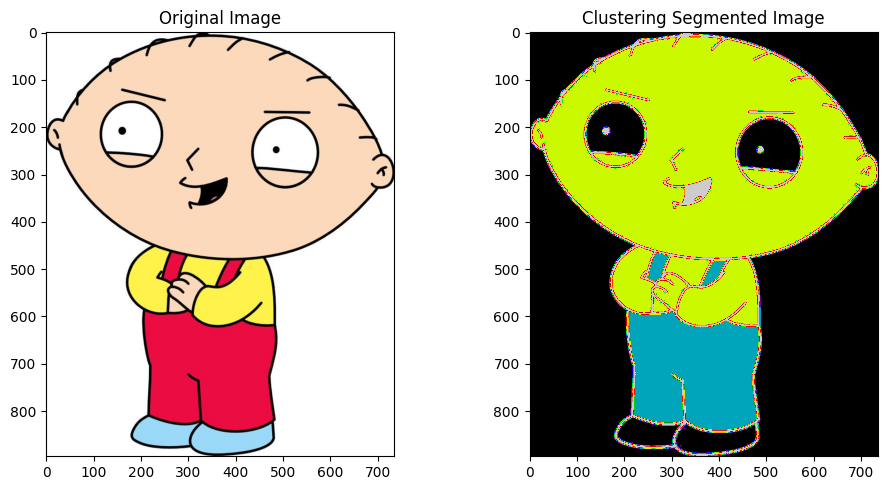

In [15]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image from the specified path
image = cv2.imread('/content/sample_data/image.jpg')

# Convert the image to RGB color space (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels, where each row contains the RGB values of a pixel
pixels = image_rgb.reshape((-1, 3))

# Convert pixel values to floating-point format for compatibility with K-Means
pixels = np.float32(pixels)

# Define the criteria for K-Means convergence and the number of clusters to find
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
num_clusters = 4

# Apply K-Means clustering to group similar pixel colors into clusters
# The result includes cluster labels and centers
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the cluster labels to a 2D mask, reshaped to match the image dimensions
segmented_mask = labels.reshape(image.shape[0], image.shape[1])

# Display the original and segmented images side by side using Matplotlib
plt.figure(figsize=(10, 5))  # Set the size of the figure
plt.subplot(1, 2, 1)  # Create the first subplot
plt.imshow(image_rgb)  # Display the original RGB image
plt.title('Original Image')  # Set the title for the subplot

plt.subplot(1, 2, 2)  # Create the second subplot
plt.imshow(segmented_mask, cmap='nipy_spectral')  # Display the segmented mask as an image with the specified colormap
plt.title('Clustering Segmented Image')  # Set the title for the subplot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot containing both subplots


# **6.	ANN based Image Segmentation**

1/1 [==============================] - 1s 1s/step


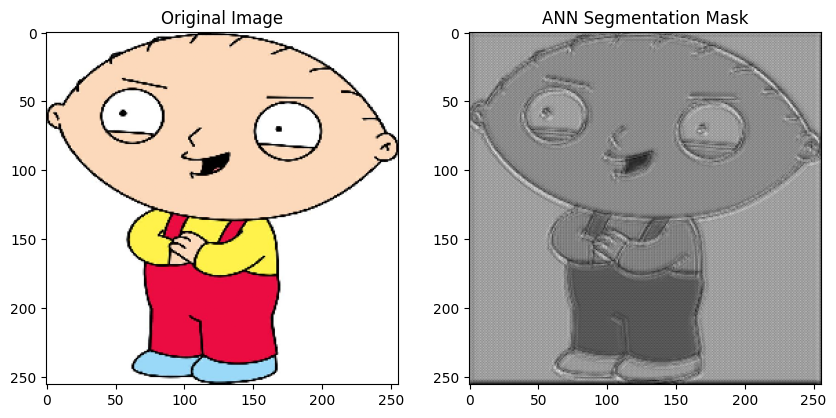

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the U-Net architecture
def unet(input_shape):
    inputs = keras.Input(input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Middle
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Decoder
    upconv2 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv3)
    concat2 = layers.concatenate([conv2, upconv2], axis=-1)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat2)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)

    upconv1 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv4)
    concat1 = layers.concatenate([conv1, upconv1], axis=-1)
    conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(concat1)
    conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)

    # Output
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv5)

    model = keras.Model(inputs, outputs)
    return model

# Load and preprocess the image
def load_and_preprocess_image(image_path, target_size):
    image = keras.preprocessing.image.load_img(image_path, target_size=target_size)
    image_array = keras.preprocessing.image.img_to_array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    return image_array

# Load the model
input_shape = (256, 256, 3)  # Adjust the input shape as needed
model = unet(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy')

# Load and preprocess the image
image_path = '/content/sample_data/image.jpg'
input_image = load_and_preprocess_image(image_path, target_size=input_shape[:2])

# Perform segmentation
segmentation_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Post-process the mask if needed (thresholding, etc.)
# ...

# Display the original image and the segmentation mask
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask, cmap='gray')
plt.title('ANN Segmentation Mask')

plt.show()